# Import Libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read in data
train = pd.read_csv("/kaggle/input/playground-series-s5e4/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s5e4/test.csv")

# EDA

In [3]:
def check(df):
    """
    Generates a concise summary of DataFrame columns.
    """
    # Use list comprehension to iterate over each column
    summary = [
        [col, df[col].dtype, df[col].count(), df[col].nunique(), df[col].isnull().sum(), df.duplicated().sum()]
        for col in df.columns
    ]

    # Create a DataFrame from the list of lists
    df_check = pd.DataFrame(summary, columns=["column", "dtype", "instances", "unique", "sum_null", "duplicates"])

    return df_check

In [4]:
print("Training Data Summary")
display(check(train))
display(train.head())

print("Test Data Summary")
display(check(test))
display(test.head())

Training Data Summary


,column,dtype,instances,unique,sum_null,duplicates
0,id,int64,750000,750000,0,0
1,Podcast_Name,object,750000,48,0,0
2,Episode_Title,object,750000,100,0,0
3,Episode_Length_minutes,float64,662907,12268,87093,0
4,Genre,object,750000,10,0,0
5,Host_Popularity_percentage,float64,750000,8038,0,0
6,Publication_Day,object,750000,7,0,0
7,Publication_Time,object,750000,4,0,0
8,Guest_Popularity_percentage,float64,603970,10019,146030,0
9,Number_of_Ads,float64,749999,12,1,0


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


Test Data Summary


,column,dtype,instances,unique,sum_null,duplicates
0,id,int64,250000,250000,0,0
1,Podcast_Name,object,250000,48,0,0
2,Episode_Title,object,250000,100,0,0
3,Episode_Length_minutes,float64,221264,11631,28736,0
4,Genre,object,250000,10,0,0
5,Host_Popularity_percentage,float64,250000,8010,0,0
6,Publication_Day,object,250000,7,0,0
7,Publication_Time,object,250000,4,0,0
8,Guest_Popularity_percentage,float64,201168,9961,48832,0
9,Number_of_Ads,float64,250000,6,0,0


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive
3,750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive
4,750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral


## Visualizations

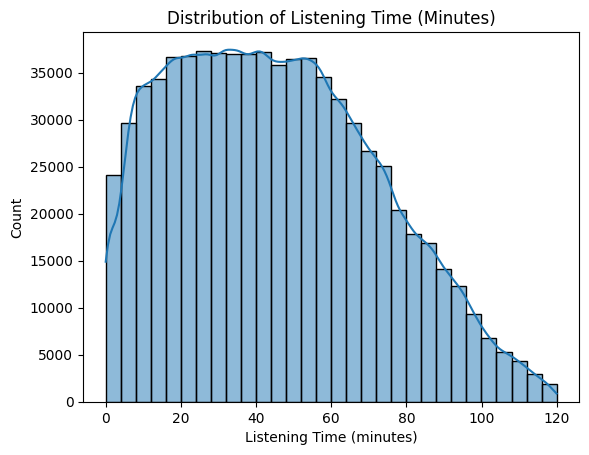

In [5]:
# Distribution of Listening_Time_minutes
sns.histplot(data=train, x='Listening_Time_minutes', bins=30, kde=True)
plt.title('Distribution of Listening Time (Minutes)')
plt.xlabel('Listening Time (minutes)')
plt.show()

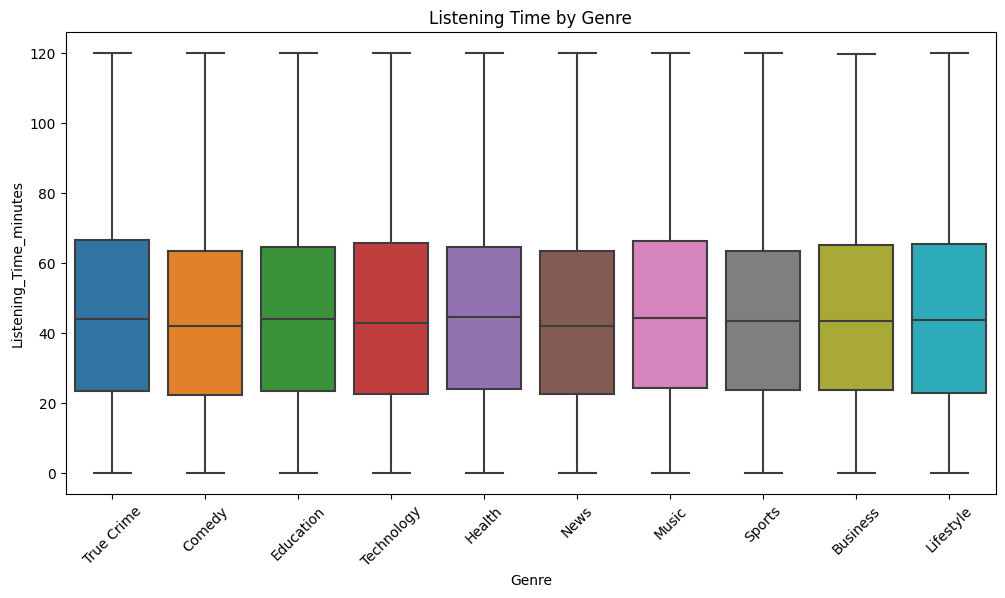

In [6]:
# Listening_Time_minutes across different Genre categories
plt.figure(figsize=(12, 6))
sns.boxplot(data=train, x='Genre', y='Listening_Time_minutes')
plt.xticks(rotation=45)
plt.title('Listening Time by Genre')
plt.show()

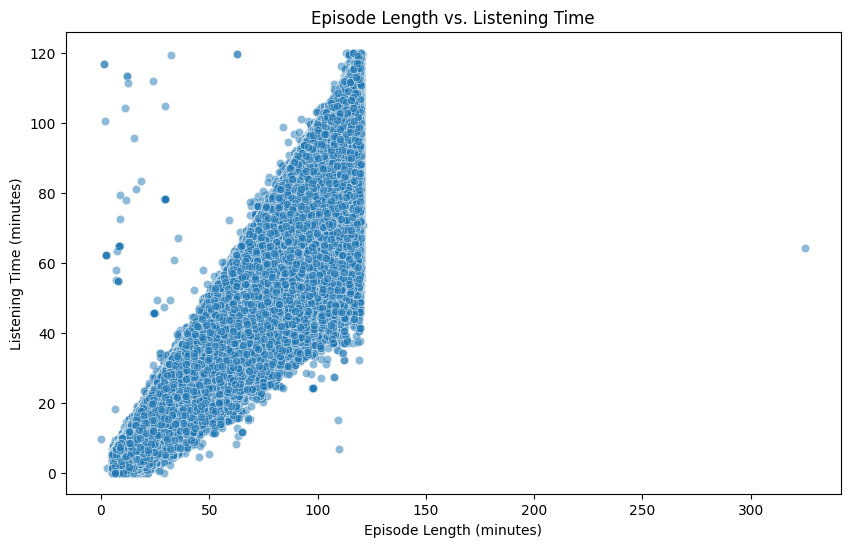

In [7]:
# Episode Length vs. Listening Time
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x='Episode_Length_minutes', y='Listening_Time_minutes', alpha=0.5)
plt.title('Episode Length vs. Listening Time')
plt.xlabel('Episode Length (minutes)')
plt.ylabel('Listening Time (minutes)')
plt.show()

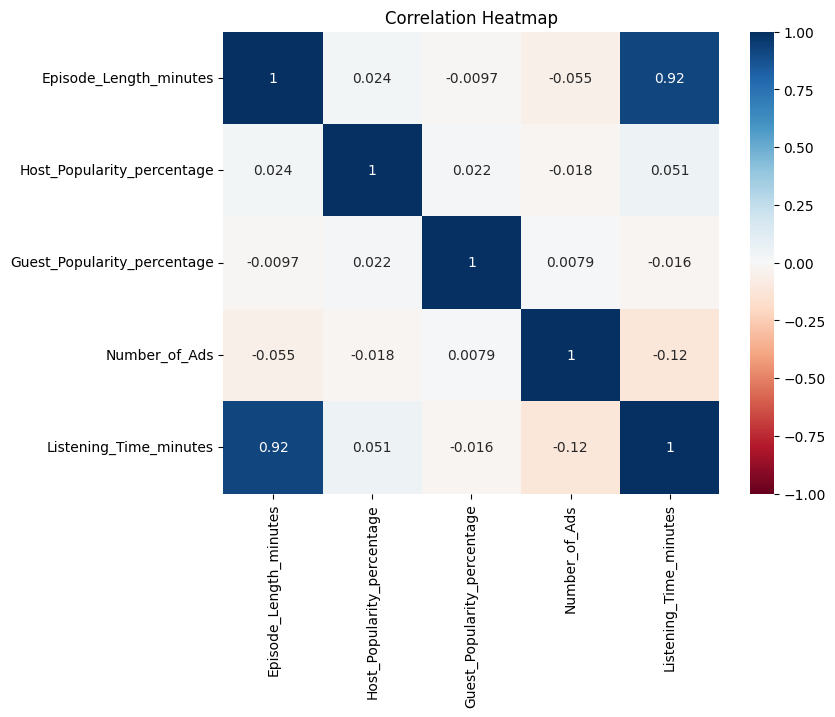

In [8]:
# Correlation Matrix of Numerical Features
plt.figure(figsize=(8, 6))
sns.heatmap(train[['Episode_Length_minutes', 'Host_Popularity_percentage', 'Guest_Popularity_percentage', 'Number_of_Ads', 'Listening_Time_minutes']].corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

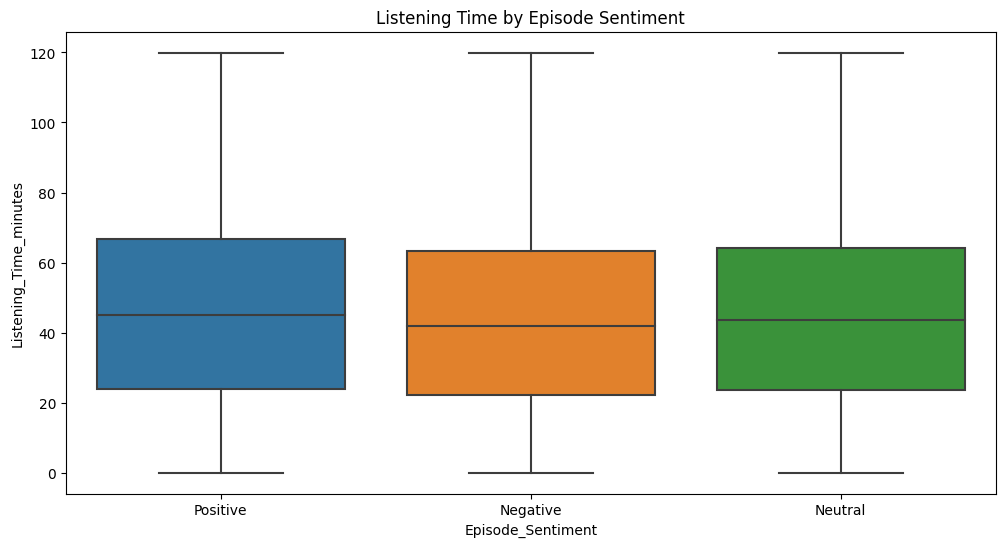

In [9]:
# Listening Time by Episode Sentiment
plt.figure(figsize=(12, 6))
sns.boxplot(data=train, x='Episode_Sentiment', y='Listening_Time_minutes')
plt.title('Listening Time by Episode Sentiment')
plt.show()

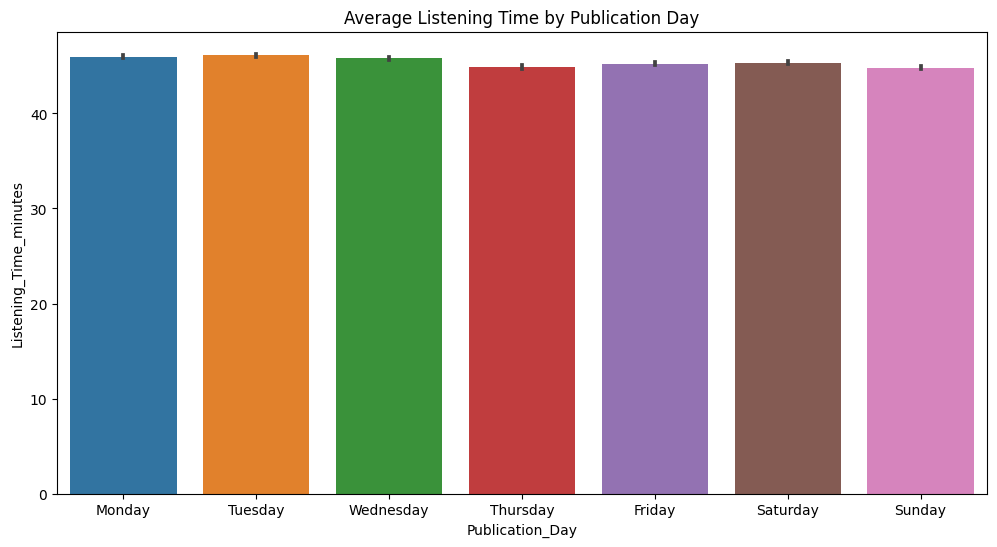

In [10]:
# Average Listening_Time_minutes for each Publication_Day
plt.figure(figsize=(12, 6))
sns.barplot(data=train, x='Publication_Day', y='Listening_Time_minutes', estimator='mean', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Average Listening Time by Publication Day')
plt.show()

# Preprocess

In [11]:
from sklearn.impute import SimpleImputer

# Define numerical columns with missing values
num_cols = ['Episode_Length_minutes', 'Guest_Popularity_percentage', 'Number_of_Ads']

# Imputer (fit on train, apply to both)
imputer = SimpleImputer(strategy='median')
train[num_cols] = imputer.fit_transform(train[num_cols])
test[num_cols] = imputer.transform(test[num_cols])  # Use train's median

In [12]:
# Convert Publication_Time to numerical bins 
time_mapping = {
    'Night': 0,
    'Morning': 6,
    'Afternoon': 12,
    'Evening': 18
}

train['Publication_Hour'] = train['Publication_Time'].map(time_mapping)
test['Publication_Hour'] = test['Publication_Time'].map(time_mapping)

# Drop original column
train.drop('Publication_Time', axis=1, inplace=True)
test.drop('Publication_Time', axis=1, inplace=True)

In [13]:
# Encode categorical variables 

# Target encoding for high cardinality columns (Too many unique values for one hot encoding)
for col in ['Podcast_Name', 'Episode_Title']:
    mean_target = train.groupby(col)['Listening_Time_minutes'].mean()
    train[col + '_encoded'] = train[col].map(mean_target)
    test[col + '_encoded'] = test[col].map(mean_target).fillna(mean_target.mean())  # Fill unseen categories

# One hot encoding for low cardinality columns
cat_cols = ['Genre', 'Publication_Day', 'Episode_Sentiment']
train = pd.get_dummies(train, columns=cat_cols, drop_first=True)
test = pd.get_dummies(test, columns=cat_cols, drop_first=True)

# Align train and test columns (in case of mismatched categories)
train, test = train.align(test, join='left', axis=1, fill_value=0)

# Drop unnecessary columns
columns_to_drop = ['Podcast_Name','Episode_Title', 'id']

train.drop(columns=columns_to_drop, inplace=True)
test.drop(columns=columns_to_drop, inplace=True)

# Modeling

In [14]:
from sklearn.model_selection import train_test_split

X = train.drop(columns=['Listening_Time_minutes'])  # Features
y = train['Listening_Time_minutes']  # Target

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

# Convert to LightGBM datasets
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

# Define parameters
params = {
    'objective': 'regression',          # For predicting Listening_Time_minutes
    'metric': 'rmse',                   # Root Mean Squared Error
    'boosting_type': 'gbdt',            # Gradient Boosted Decision Trees
    'num_leaves': 31,                   # Default value, tune later
    'learning_rate': 0.05,              # Smaller = slower, more robust
    'feature_fraction': 0.9,            # Use 90% of features per tree
    'verbose': -1                       # Suppress warnings
}

# Train with early stopping using callback
model = lgb.train(
    params,
    train_data,
    num_boost_round=1000,               # Max iterations
    valid_sets=[val_data],              # Validation set for monitoring
    valid_names=['validation'],         # Name for validation set in output
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),  # Stop if no improvement for 50 rounds
        lgb.log_evaluation(period=10)            # Print progress every 10 rounds
    ]
)

# Best iteration is automatically selected
print(f"Best iteration: {model.best_iteration}")

# Predict on validation set
y_val_pred = model.predict(X_val, num_iteration=model.best_iteration)

rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(f"Validation RMSE: {rmse}")

Training until validation scores don't improve for 50 rounds
[10]	validation's rmse: 20.518
[20]	validation's rmse: 16.8082
[30]	validation's rmse: 14.5883
[40]	validation's rmse: 13.7394
[50]	validation's rmse: 13.3776
[60]	validation's rmse: 13.2217
[70]	validation's rmse: 13.1488
[80]	validation's rmse: 13.1172
[90]	validation's rmse: 13.1001
[100]	validation's rmse: 13.0889
[110]	validation's rmse: 13.0816
[120]	validation's rmse: 13.0756
[130]	validation's rmse: 13.0708
[140]	validation's rmse: 13.0674
[150]	validation's rmse: 13.0647
[160]	validation's rmse: 13.0627
[170]	validation's rmse: 13.0602
[180]	validation's rmse: 13.0582
[190]	validation's rmse: 13.0563
[200]	validation's rmse: 13.0541
[210]	validation's rmse: 13.0522
[220]	validation's rmse: 13.0504
[230]	validation's rmse: 13.0478
[240]	validation's rmse: 13.0458
[250]	validation's rmse: 13.0444
[260]	validation's rmse: 13.0432
[270]	validation's rmse: 13.0419
[280]	validation's rmse: 13.0406
[290]	validation's rmse: 